In [1]:
# dataset: ingredients.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('ingredients.csv')
df

,sweetness,crunchiness,ingredients,class
0,1,1,cheese,protein
1,3,1,fish,protein
2,2,2,shrimp,protein
3,1,4,bacon,protein
4,3,5,nuts,protein
5,1,9,lettuce,vegetable
6,2,8,cucumber,vegetable
7,3,7,green bean,vegetable
8,5,10,carrot,vegetable
9,3,10,celery,vegetable


In [7]:
import warnings
warnings.filterwarnings('ignore')

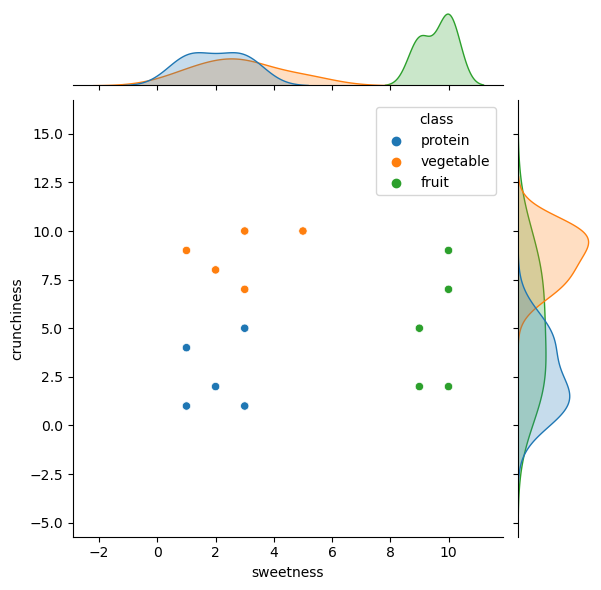

In [9]:
sns.jointplot(x = 'sweetness', y = 'crunchiness', data = df,
             hue = 'class');

In [11]:
# separate the data

x = df[['sweetness', 'crunchiness']]

y = df['class']

# build the model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors= 4)

In [18]:
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=4)

In [20]:
# predict

knn.predict([[6, 4]])

array(['fruit'], dtype=object)

In [22]:
# cross validation

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   random_state= 0,
                                                   test_size= 0.25)

In [28]:
x_train.shape

(11, 2)

In [30]:
y_train.shape

(11,)

In [36]:
error = []
for i in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [38]:
error

[0.0, 0.0, 0.0, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0]

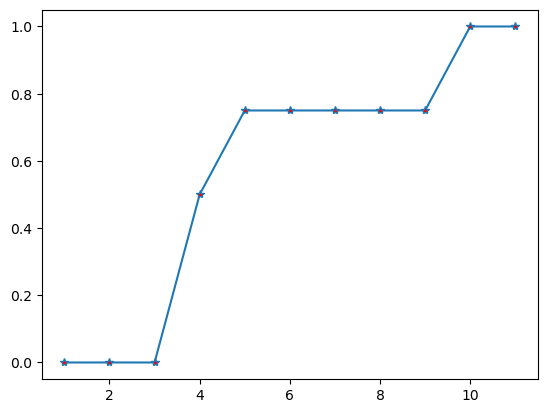

In [40]:
plt.plot(range(1,12), error, marker = '*', mfc = 'red');